# Applied Data Science Capstone
---
# Battle of Neighborhoods: 
#### New York City & Airbnb Listings 

Author: Luz Ortega

![title](https://storage.needpix.com/thumbs/manhattan-2362419_1280.jpg)

----

This project is for the Applied Data Science Capstone Course, a course part of the IBM Data Science Professional Certificate Specialization, where students learn about location data, location data providers, as well as Python libraries to manipulate, explore, analyze, and visualize data. The problem and analysis approach for this project can be chosen by the student, however, it is required to leverage the Fourquare location data to solve the problem.

----

## Project Summary
---

The main goal of this project is to provide a tool to explore and analyze the neighborhoods of New York City as well as Inside Airbnb data from NYC to recommend Airbnb locations based on the surrounding venues of the rental places and listing data.

This project uses the Foursquare API data to determine the most common venues surrounding rental places from Airbnb. This way, the renter can determine based on on surrounding venues and the rating score what place to rent. The results from this project can also benefit the home-owners interested or already renting out their properties because they can use the information to maximize their vacation rental listing description to make the most impact on guests and targeting potential guests. 


The key tasks of this project are:

1. Download Datasets
    1. New York City Map
    1. Inside Airbnb
    1. FourSquare  
2. Explore and Analyze Neighborhoods in New York City

3. Explore and Analyze Airbnb listings in New York City

4. Cluster listings based on surrounding venues 

5. Examine Clusters


## Python packages/libraries

* **NumPy:** Library to handle data in a vectorized manner
* **Pandas:** Library for data analysis
* **JSON:** Library to handle JSON files
* **Geopy:** Library to obtain geographical coordinates
* **Requests:** Library to handle requests
* **Matplotlib:** Plotting library
* **Scipy:** Library for scientific computing
* **Sklearn:** Machine learning library
* **Folium:** Map rendering library

Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as colors

# import stats for Anova
from scipy import stats

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    openssl-1.0.2p             |       h470a237_2         3.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0         conda-forge
    geopy:         1.18.1-py_0       conda-forge

The following packages will be UPDATED:

    openssl:       1.0.2p-h470a237_1 conda-forge --> 1.0.2p-h470a237_2 conda-forge


geopy-1.18.1         | 51 KB     | ##################################### | 100% 
ope

In [12]:
print('Welcome to the Capstone Project Course!')

Welcome to the Capstone Project Course!


## Download and Explore Datasets

### New York City Map
This dataset was created as a guide to New York City’s neighborhoods that appear on the web resource, "New York: A City of Neighborhoods" and it is available online at the New York University Spatial Data Repository website (https://geo.nyu.edu/catalog/nyu_2451_34572). The dataset has all 5 boroughs and 306 neighborhoods as well as the the latitude and longitude coordinates of each neighborhood. 


Load and explore dataset

In [13]:
# File downloaded and in computer
# Load data
with open('nyc_data.json') as json_data:
    newyork_data = json.load(json_data)

In [14]:
# To look at the data you can just call the data
# For this notebook this call is commented
#newyork_data

The *features* key includes all the relevant information related to the neighborhoods. A new variable is defined to include this information. 

In [15]:
neighborhoods_data = newyork_data['features']

In [16]:
# First item of the list
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the NYC map data into a *pandas* dataframe

The dataset is a collection of nested Python dictionaries. This data will be transformed into a *pandas* dataframe.

In [17]:
## Create an empty dataframe
# Define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# Create the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [18]:
# Look at the dataframe to verify that columns are as intended
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [19]:
# Loop through the data and fill dataframe one row at a time

for data in neighborhoods_data:
    
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_coords = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_coords[1]
    neighborhood_lon = neighborhood_coords[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [20]:
# Examine resulting dataframe
neighborhoods.head(3)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806


In [21]:
# Verify that dataframe has 5 boroughs and 306 neighborhoods (just as the json file)
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),neighborhoods['Neighborhood'].shape[0]))

The dataframe has 5 boroughs and 306 neighborhoods.


In [22]:
# Verify shape of the dataframe -> 306 rows and 4 columns
neighborhoods.shape

(306, 4)

#### Dataset Exploration

How many neighborhoods are in each borough?

In [23]:
# We can use groupby to check how many neighborhoods are in each borough
neighborhoods.groupby('Borough').size()

Borough
Bronx            52
Brooklyn         70
Manhattan        40
Queens           81
Staten Island    63
dtype: int64

Based on this dataset, Queens is the borough with more neighborhoods (81) and Manhattan is the one with the least amount of neighborhoods (40). Let's plot the number of neighborhoods per borough.

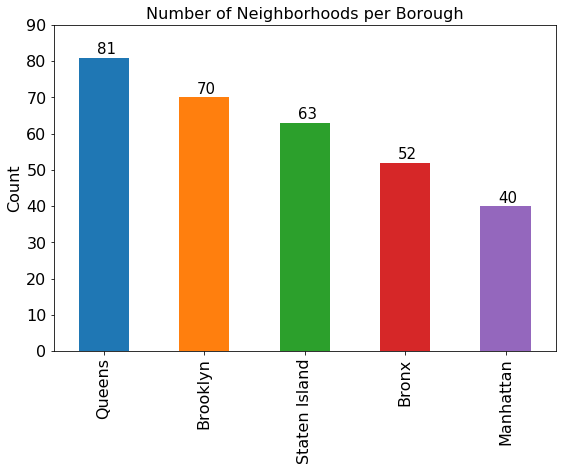

In [24]:
%matplotlib inline
# libraries already imported, if not uncomment next two lines
#import matplotlib as plt
#from matplotlib import pyplot
ax = neighborhoods['Borough'].value_counts().plot(kind='bar', figsize=(9,6),
                                     fontsize=16);
ax.set_alpha(0.8)
ax.set_title("Number of Neighborhoods per Borough", fontsize=16)
ax.set_ylabel("Count", fontsize=16);
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

# set individual bar labels
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.18, i.get_height()+1, i.get_height(), fontsize=15)

In [8]:
# we can also groupby the data based on the borough and include the name of each neighborhood
# print(neighborhoods.groupby(['Borough', 'Neighborhood']).size())

#### Use geopy library to get the latitude and longitude values of New York City.

In [25]:
address = 'New York City, NY'
# Next couple lines ignore warning from Nominatim
import warnings
warnings.filterwarnings('ignore')

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


#### Create a map of New York with neighborhoods superimposed on top.

In [26]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Inside Airbnb

Inside Airbnb is an independent, non-commercial, open source data tool that allows users to explore Airbnb data. The dataset was downloaded from http://insideairbnb.com/get-the-data.html and compiled on December 06, 2018. The data behind the Inside Airbnb site is sourced from publicly available information from the Airbnb site

In [32]:
# This file contains a subset of the keys (columns) of the original dataframe
listings = pd.read_csv("listingsnyc.csv")

print("Listings data read into dataframe!") 

Listings data read into dataframe!


Let's find what are the keys of the dataframe, i.e., the columns names.

In [33]:
listings.keys()

Index(['id', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'price', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [34]:
# Shape of the dataframe
listings.shape

(49056, 18)

In [35]:
# Let's take a look to the dataframe
listings.head()

,id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2515,Harlem,Harlem,Manhattan,40.799205,-73.953676,Private room,3,59,2,175,93.0,9.0,9.0,10.0,9.0,9.0,9.0
1,2539,Kensington,Kensington,Brooklyn,40.647486,-73.972370,Private room,4,149,1,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0
2,2595,Midtown,Midtown,Manhattan,40.753621,-73.983774,Entire home/apt,2,225,1,41,95.0,9.0,9.0,10.0,10.0,10.0,9.0
3,3330,Williamsburg,Williamsburg,Brooklyn,40.708558,-73.942362,Private room,2,70,5,38,98.0,10.0,10.0,10.0,10.0,10.0,10.0
4,3647,Harlem,Harlem,Manhattan,40.809018,-73.941902,Private room,2,150,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some data cleaning needs to be done before working with this dataset. Among the data cleaning tasks are: delete columns, check missing values, rename columns, check format, etc.

This dataset has the latitude and longitude for each listing. However, it doesn't provide the coordinates for each neighborhood, so if we want to visualize in a map the neighborhoods contained in this dataset we need to verify the names to match the NYC Map dataset and then merge both datasets.


Check how many neighborhoods are in each borough of this dataset

In [36]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(listings['neighbourhood_group_cleansed'].unique()),len(listings['neighbourhood_cleansed'].unique())))
                                      

The dataframe has 5 boroughs and 223 neighborhoods.


The NYC Map dataset has 306 neighborhoods, while the InsideAirbnb dataset has only 223. Some of the reasons for this issue if that some datasets consider multiple neighborhoods as single neighhorhoods, while others group multiple neighborhoods as one neighborhood. For example, some datasets consider East Harlem, Central Harlem, and West Harlem as different neighborhoods, while other datasets group the three of them as Harlem.

Before addressing the neighborhood names issue, let's continue cleaning the dataset

In [37]:
# keep only neighboughood cleaned, the dataset did an initial cleaning for the neighborhoods
# we want to keep the "cleaned" data, so let's delete neighbourhood column (uncleaned)
listings.drop(['neighbourhood'], axis=1, inplace=True)
# Lets rename columns we dont plan to delete at this moment
listings.rename(columns= {'id':'ID','neighbourhood_cleansed':'Neighborhood','neighbourhood_group_cleansed': 'Borough', 'latitude': 'Latitude', 'longitude':'Longitude'}, inplace=True)

In [38]:
# Let's look at the dataframe
listings.head(5)

,ID,Neighborhood,Borough,Latitude,Longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2515,Harlem,Manhattan,40.799205,-73.953676,Private room,3,59,2,175,93.0,9.0,9.0,10.0,9.0,9.0,9.0
1,2539,Kensington,Brooklyn,40.647486,-73.972370,Private room,4,149,1,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0
2,2595,Midtown,Manhattan,40.753621,-73.983774,Entire home/apt,2,225,1,41,95.0,9.0,9.0,10.0,10.0,10.0,9.0
3,3330,Williamsburg,Brooklyn,40.708558,-73.942362,Private room,2,70,5,38,98.0,10.0,10.0,10.0,10.0,10.0,10.0
4,3647,Harlem,Manhattan,40.809018,-73.941902,Private room,2,150,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# for this project we will not consider listings if no review scores are provided
# make sure there are no NaN values in any score column 
listings = listings.dropna(subset=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])
# reset index and drop index column (we need to this when we delete rows)
listings.reset_index(inplace=True)
listings.drop('index', axis='columns', inplace=True)
print('Updated size of the dataframe:', listings.shape)
# check dataframe
listings.head(5)

Updated size of the dataframe: (37647, 17)


,ID,Neighborhood,Borough,Latitude,Longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2515,Harlem,Manhattan,40.799205,-73.953676,Private room,3,59,2,175,93.0,9.0,9.0,10.0,9.0,9.0,9.0
1,2539,Kensington,Brooklyn,40.647486,-73.972370,Private room,4,149,1,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0
2,2595,Midtown,Manhattan,40.753621,-73.983774,Entire home/apt,2,225,1,41,95.0,9.0,9.0,10.0,10.0,10.0,9.0
3,3330,Williamsburg,Brooklyn,40.708558,-73.942362,Private room,2,70,5,38,98.0,10.0,10.0,10.0,10.0,10.0,10.0
4,3831,Clinton Hill,Brooklyn,40.685138,-73.959757,Entire home/apt,3,89,1,221,90.0,9.0,9.0,10.0,10.0,9.0,9.0


In [40]:
# For this project, and ease of visualization only take into account room types that are entire home/apt
listings.drop(listings[listings.room_type == 'Private room'].index, inplace=True)
listings.head(5)

,ID,Neighborhood,Borough,Latitude,Longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2,2595,Midtown,Manhattan,40.753621,-73.983774,Entire home/apt,2,225,1,41,95.0,9.0,9.0,10.0,10.0,10.0,9.0
4,3831,Clinton Hill,Brooklyn,40.685138,-73.959757,Entire home/apt,3,89,1,221,90.0,9.0,9.0,10.0,10.0,9.0,9.0
5,5022,East Harlem,Manhattan,40.798514,-73.943991,Entire home/apt,1,80,10,9,93.0,10.0,9.0,10.0,10.0,9.0,10.0
6,5099,Murray Hill,Manhattan,40.747672,-73.974997,Entire home/apt,2,185,2,70,88.0,9.0,9.0,10.0,10.0,9.0,9.0
10,5216,Flatiron District,Manhattan,40.743572,-73.989987,Entire home/apt,4,126,26,34,82.0,8.0,8.0,9.0,9.0,10.0,8.0


In [41]:
# Reset index and drop index column
listings.reset_index(inplace=True)
listings.drop('index', axis='columns', inplace=True)
# get rid of NAN values for room_type 
listings.dropna(subset=['room_type'])
print('Updated size of the dataframe:',listings.shape)
listings.head()

Updated size of the dataframe: (21087, 17)


,ID,Neighborhood,Borough,Latitude,Longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2595,Midtown,Manhattan,40.753621,-73.983774,Entire home/apt,2,225,1,41,95.0,9.0,9.0,10.0,10.0,10.0,9.0
1,3831,Clinton Hill,Brooklyn,40.685138,-73.959757,Entire home/apt,3,89,1,221,90.0,9.0,9.0,10.0,10.0,9.0,9.0
2,5022,East Harlem,Manhattan,40.798514,-73.943991,Entire home/apt,1,80,10,9,93.0,10.0,9.0,10.0,10.0,9.0,10.0
3,5099,Murray Hill,Manhattan,40.747672,-73.974997,Entire home/apt,2,185,2,70,88.0,9.0,9.0,10.0,10.0,9.0,9.0
4,5216,Flatiron District,Manhattan,40.743572,-73.989987,Entire home/apt,4,126,26,34,82.0,8.0,8.0,9.0,9.0,10.0,8.0


In [42]:
# For this purpose of this project we will only analyze those listings that only require 1 night. 
# Minimum_nights --> 1
listings.drop(listings[listings.minimum_nights != 1].index, inplace=True)
listings.head(5)

,ID,Neighborhood,Borough,Latitude,Longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2595,Midtown,Manhattan,40.753621,-73.983774,Entire home/apt,2,225,1,41,95.0,9.0,9.0,10.0,10.0,10.0,9.0
1,3831,Clinton Hill,Brooklyn,40.685138,-73.959757,Entire home/apt,3,89,1,221,90.0,9.0,9.0,10.0,10.0,9.0,9.0
5,5238,Chinatown,Manhattan,40.713444,-73.990375,Entire home/apt,3,150,1,152,93.0,9.0,9.0,10.0,10.0,9.0,9.0
19,12048,Lower East Side,Manhattan,40.714009,-73.989171,Shared room,1,40,1,207,96.0,9.0,9.0,10.0,10.0,9.0,10.0
36,16595,Williamsburg,Brooklyn,40.709330,-73.967918,Entire home/apt,3,270,1,129,93.0,10.0,9.0,10.0,10.0,9.0,9.0


In [43]:
# drop NaN minimum_nights
listings.dropna(subset=['minimum_nights'])
# reset index and delete index column 
listings.reset_index(inplace=True)
listings.drop('index', axis='columns', inplace=True)
print('Updated size of the dataframe:',listings.shape)

Updated size of the dataframe: (3996, 17)


In [44]:
# drop columns
# get rid of number of reviews
# get rid of minimum nights since it's always one
# get rid of room type since it's always entire place
listings.drop(['number_of_reviews', 'minimum_nights', 'room_type'], axis=1, inplace=True)
print('Updated size of the dataframe:', listings.shape)

Updated size of the dataframe: (3996, 14)


In [45]:
# Let's analyze only listigns that minimum accomodates 2 people
# delete listings that only accomodates 1 
listings.drop(listings[listings.accommodates == 1].index, inplace=True)
# fix index
listings.reset_index(inplace=True)
listings.drop('index', axis='columns', inplace=True)
print('Updated size of the dataframe:', listings.shape)

Updated size of the dataframe: (3684, 14)


In [46]:
# drop accomodates column
listings.drop(['accommodates'], axis=1, inplace=True)
print('Updated size of the dataframe:', listings.shape)
listings.head()

Updated size of the dataframe: (3684, 13)


,ID,Neighborhood,Borough,Latitude,Longitude,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2595,Midtown,Manhattan,40.753621,-73.983774,225,95.0,9.0,9.0,10.0,10.0,10.0,9.0
1,3831,Clinton Hill,Brooklyn,40.685138,-73.959757,89,90.0,9.0,9.0,10.0,10.0,9.0,9.0
2,5238,Chinatown,Manhattan,40.713444,-73.990375,150,93.0,9.0,9.0,10.0,10.0,9.0,9.0
3,16595,Williamsburg,Brooklyn,40.709330,-73.967918,270,93.0,10.0,9.0,10.0,10.0,9.0,9.0
4,19601,Brooklyn Heights,Brooklyn,40.697230,-73.992685,800,93.0,10.0,9.0,10.0,10.0,10.0,9.0


In [47]:
# Rename columns for consistency
listings.rename(columns= {'price':'Price','review_scores_rating':'RS_rating','review_scores_accuracy': 'RS_accuracy', 'review_scores_cleanliness': 'RS_cleanliness', 'review_scores_checkin':'RS_checkin', 'review_scores_communication':'RS_communication', 'review_scores_location':'RS_location', 'review_scores_value':'RS_value'}, inplace=True)
listings.head()

,ID,Neighborhood,Borough,Latitude,Longitude,Price,RS_rating,RS_accuracy,RS_cleanliness,RS_checkin,RS_communication,RS_location,RS_value
0,2595,Midtown,Manhattan,40.753621,-73.983774,225,95.0,9.0,9.0,10.0,10.0,10.0,9.0
1,3831,Clinton Hill,Brooklyn,40.685138,-73.959757,89,90.0,9.0,9.0,10.0,10.0,9.0,9.0
2,5238,Chinatown,Manhattan,40.713444,-73.990375,150,93.0,9.0,9.0,10.0,10.0,9.0,9.0
3,16595,Williamsburg,Brooklyn,40.709330,-73.967918,270,93.0,10.0,9.0,10.0,10.0,9.0,9.0
4,19601,Brooklyn Heights,Brooklyn,40.697230,-73.992685,800,93.0,10.0,9.0,10.0,10.0,10.0,9.0


#### Dataset Exploration

Let's do some data exploration with this dataset. 

In [48]:
print(listings.groupby('Borough').size())

Borough
Bronx              65
Brooklyn         1181
Manhattan        1922
Queens            494
Staten Island      22
dtype: int64


Manhattan has the largest amount of listings (1922), followed by Brooklyn (1181), while Staten Island has the least number of listings (22)

In [49]:
# Lets create a dataframe of the Neighborhood and the corresponding Borough of the final listing dataframe
grouped = listings[['Borough','Neighborhood']]

In [50]:
grouped.shape

(3684, 2)

In [51]:
grouped = grouped.drop_duplicates().reset_index()
grouped.drop(['index'], axis=1, inplace=True)

In [52]:
grouped.shape

(166, 2)

In [53]:
# How many neighborhoods do we have in this dataset?
len(listings['Neighborhood'].unique())

166

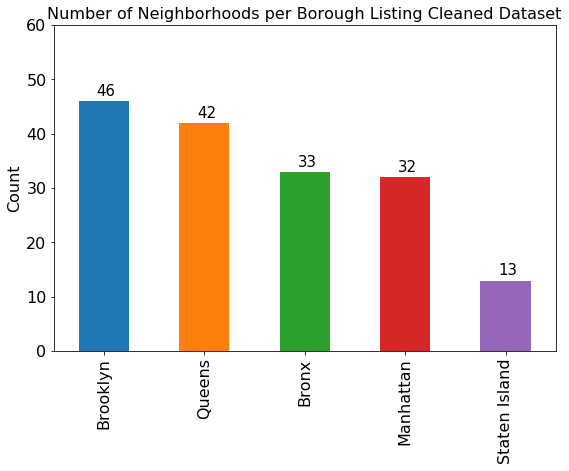

In [54]:
# plot of number of neighborhoods per Bororugh (for visualization purposes)
%matplotlib inline
# uncomment next couple lines if matplotlit hasnt been imported
#import matplotlib as plt
#from matplotlib import pyplot
ax = grouped['Borough'].value_counts().plot(kind='bar', figsize=(9,6),
                                     fontsize=16);
ax.set_alpha(0.8)
ax.set_title("Number of Neighborhoods per Borough Listing Cleaned Dataset", fontsize=16)
ax.set_ylabel("Count", fontsize=16);
ax.set_yticks([0, 10, 20, 30, 40, 50, 60])

# set individual bar labels
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.18, i.get_height()+1, i.get_height(), fontsize=15)

In [55]:
# before creating map of listings, lets change listings to string to create labels in map
listings['ID'] = listings['ID'].astype(str)
listings.shape

(3684, 13)

Let's check what is the average price for the listings for the different Boroughs

In [56]:
# create dataframe of borough and price
df_group_borough_price=listings[['Borough','Price']]

In [57]:
# group by borough and calculate mean
df_group_borough_price=df_group_borough_price.groupby(['Borough'],as_index= False).mean()
df_group_borough_price

,Borough,Price
0,Bronx,105.707692
1,Brooklyn,197.159187
2,Manhattan,235.511967
3,Queens,134.125506
4,Staten Island,106.454545


Manhattan has the highest listing average price, 235.51. Bronx has the lowest listing average price, 105.71

In [58]:
# create dataframe of borough and price
df_group_neighborhood_price=listings[['Neighborhood','Borough','Price']]
df_group_neighborhood_price.head()

,Neighborhood,Borough,Price
0,Midtown,Manhattan,225
1,Clinton Hill,Brooklyn,89
2,Chinatown,Manhattan,150
3,Williamsburg,Brooklyn,270
4,Brooklyn Heights,Brooklyn,800


In [59]:
# group by neighborhood and calculate mean
df_group_neighborhood_price=df_group_neighborhood_price.groupby(['Neighborhood'],as_index= False).mean()
df_group_neighborhood_price.head()

,Neighborhood,Price
0,Allerton,68.000000
1,Arden Heights,75.000000
2,Arverne,241.066667
3,Astoria,129.315789
4,Bath Beach,123.500000


#### ANOVA: Analysis of Variance
The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells us the statistical significance of our calculated score value.

Let's run an ANOVA to check if the average listing price is significantly different depending of the Borough. If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

In [60]:
# from scipy import stats
borough_anova=listings[['Borough','Price']].groupby(['Borough'])
f_val, p_val = stats.f_oneway(borough_anova.get_group('Brooklyn')['Price'], borough_anova.get_group('Queens')['Price'], borough_anova.get_group('Bronx')['Price'], borough_anova.get_group('Manhattan')['Price'], borough_anova.get_group('Staten Island')['Price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 11.440862923819846 , P = 3.1391644920354877e-09


The ANOVA results show that the average price is significantly different depending on the Borough.

Some other statistics we can get are below.

In [61]:
# create dataframe of neighborhood and price
df_group_neighborhood_price=listings[['Neighborhood','Price']]

In [62]:
# group by neighborhood and calculate mean
df_group_neighborhood_price=df_group_neighborhood_price.groupby(['Neighborhood'],as_index= False).mean()
df_group_neighborhood_price.head()

,Neighborhood,Price
0,Allerton,68.000000
1,Arden Heights,75.000000
2,Arverne,241.066667
3,Astoria,129.315789
4,Bath Beach,123.500000


In [63]:
listings.describe()

,Latitude,Longitude,Price,RS_rating,RS_accuracy,RS_cleanliness,RS_checkin,RS_communication,RS_location,RS_value
count,3684.000000,3684.000000,3684.000000,3684.000000,3684.000000,3684.000000,3684.000000,3684.000000,3684.000000,3684.000000
mean,40.730767,-73.952822,206.560803,93.519815,9.577090,9.293974,9.717155,9.755429,9.554832,9.328719
std,0.053310,0.052056,338.631421,7.445258,0.777624,0.982970,0.658963,0.610489,0.714446,0.788342
min,40.532648,-74.210166,10.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,40.693197,-73.987185,105.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,40.729379,-73.960638,150.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,40.763832,-73.939648,218.250000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,40.903895,-73.728375,10000.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [64]:
# number of neighbors, boroughs, unique
listings.describe(include=['object'])

,ID,Neighborhood,Borough
count,3684,3684,3684
unique,3684,166,5
top,16426099,Williamsburg,Manhattan
freq,1,236,1922


#### Visualization of neighborhoods of Insideairbnb dataset

Now that we are done with the analysis of the InsideAirbnb dataset, we can use the NYC dataset to get the coordinates of the neighborhoods and plot them.

In [65]:
print('Number of neighborhoods in cleaned listing dataset:', len(listings['Neighborhood'].unique()))
listings['Neighborhood'].unique()

Number of neighborhoods in cleaned listing dataset: 166


array(['Midtown', 'Clinton Hill', 'Chinatown', 'Williamsburg',
       'Brooklyn Heights', 'Chelsea', 'East Village', 'Upper East Side',
       'Bedford-Stuyvesant', 'Harlem', 'Greenwich Village', 'Eastchester',
       'Greenpoint', 'Long Island City', 'Lower East Side',
       'West Village', 'Park Slope', 'Woodlawn', 'Fort Greene',
       "Hell's Kitchen", 'Bensonhurst', 'East Harlem', 'Gramercy',
       'Gowanus', 'Upper West Side', 'East New York', 'Ozone Park',
       'Brighton Beach', 'Financial District', 'Kensington', 'Jamaica',
       'Flatbush', 'Nolita', 'Washington Heights', 'Crown Heights',
       'Red Hook', 'Arverne', 'Murray Hill', 'Allerton',
       'Flatiron District', 'Fieldston', 'Bushwick', 'Flushing',
       'Briarwood', 'Tribeca', 'Astoria', 'Carroll Gardens', 'Kips Bay',
       'Cobble Hill', 'Canarsie', 'Windsor Terrace', 'Sunnyside',
       'Cypress Hills', 'South Slope', 'Inwood', 'Howard Beach',
       'Ditmars Steinway', 'Bronxdale', 'Morningside Heights',
 

In [260]:
#listings_neighborhoods=pd.DataFrame(listings['Neighborhood'].unique(), columns = ['Neighborhood'])
#listings_neighborhoods.reset_index(inplace=True)
#listings_neighborhoods.drop('index', axis='columns', inplace=True)

In [262]:
#listings_neighborhoods.head()
#listings_neighborhoods.shape

(166, 1)

In [66]:
#let's take a look again at the grouped dataframe
grouped.head()

,Borough,Neighborhood
0,Manhattan,Midtown
1,Brooklyn,Clinton Hill
2,Manhattan,Chinatown
3,Brooklyn,Williamsburg
4,Brooklyn,Brooklyn Heights


In [67]:
# check what neighborhoods names from listings df are not in the NYC dataset
# we can use the "grouped" dataframe that has all the neighborhoods of the listings dataframe 
neighborhoods_to_clean = grouped[(grouped['Neighborhood'].isin(neighborhoods['Neighborhood']) == False)]
neighborhoods_to_clean.reset_index(inplace=True)
neighborhoods_to_clean.drop('index', axis='columns', inplace=True)
print(' # of Neighborhoods from the cleaned dataset of the listings that are not in the NYC Map dataset:', neighborhoods_to_clean.shape[0])
      

 # of Neighborhoods from the cleaned dataset of the listings that are not in the NYC Map dataset: 21


In [68]:
# Let's check those neighborhoods
neighborhoods_to_clean

,Borough,Neighborhood
0,Brooklyn,Bedford-Stuyvesant
1,Manhattan,Harlem
2,Manhattan,Hell's Kitchen
3,Queens,Jamaica
4,Manhattan,Nolita
5,Manhattan,Flatiron District
6,Manhattan,Kips Bay
7,Brooklyn,South Slope
8,Queens,Ditmars Steinway
9,Manhattan,Theater District


In [69]:
# Next line of code was used to check the names of the neighborhoods of the NYC Map dataset
#neighborhoods['Neighborhood'].sort_values()

In [70]:
# neighborhoods that need to be renamed/fixed
# Note we fixed the names of the listings dataframe
# Bedford-Stuyvesant to Bedford Stuyvesant
listings['Neighborhood'].replace(["Bedford-Stuyvesant"], "Bedford Stuyvesant", inplace=True)

# Harlem to Central Harlem
listings['Neighborhood'].replace(["Harlem"], "Central Harlem", inplace=True)

# Hell's Kitchen to Clinton
listings['Neighborhood'].replace(["Hell's Kitchen"], "Clinton", inplace=True)

# Jamaica to Jamaica Center
listings['Neighborhood'].replace(["Jamaica"], "Jamaica Center", inplace=True)

# Nolita to Little Italy
listings['Neighborhood'].replace(["Nolita"], "Little Italy", inplace=True)

# Flatiron District to Flatiron
listings['Neighborhood'].replace(["Flatiron District"], "Flatiron", inplace=True)

# Kips Bay to Gramercy
listings['Neighborhood'].replace(["Kips Bay"], "Gramercy", inplace=True)

# South Slope to Park Slope
listings['Neighborhood'].replace(["South Slope"], "Park Slope", inplace=True)

# Ditmars Steinway to Steinway
listings['Neighborhood'].replace(["Ditmars Steinway"], "Steinway", inplace=True)

# Theater District to Midtown
listings['Neighborhood'].replace(["Theater District"], "Midtown", inplace=True)

# Navy Yard to Downtown
listings['Neighborhood'].replace(["Navy Yard"], "Downtown", inplace=True)

# Prospect-Lefferts Gardens to Prospect Lefferts Gardens
listings['Neighborhood'].replace(["Prospect-Lefferts Gardens"], "Prospect Lefferts Gardens", inplace=True)

# SoHo to Soho
listings['Neighborhood'].replace(["SoHo"], "Soho", inplace=True)

# NoHo to Noho
listings['Neighborhood'].replace(["NoHo"], "Noho", inplace=True)

# Downtown Brooklyn to Downtown
listings['Neighborhood'].replace(["Downtown Brooklyn"], "Downtown", inplace=True)

# East Morrisania to Morrisania
listings['Neighborhood'].replace(["East Morrisania"], "Morrisania", inplace=True)

# Columbia St to Carroll Gardens
listings['Neighborhood'].replace(["Columbia St"], "Carroll Gardens", inplace=True)

# Two Bridges to Lower East Side
listings['Neighborhood'].replace(["Two Bridges"], "Lower East Side", inplace=True)

# DUMBO to Dumbo
listings['Neighborhood'].replace(["DUMBO"], "Dumbo", inplace=True)

# Highbridge to High  Bridge
listings['Neighborhood'].replace(["Highbridge"], "High  Bridge", inplace=True)

# Mariners Harbor
listings['Neighborhood'].replace(["Mariners Harbor"], "Mariner's Harbor", inplace=True)

Lets create a dataframe that has the neighborhoods of the listings dataframe plus the latitude and longitude of each neighborhood (the coordinates are obtained from the NYC Mapa dataset).

In [71]:
# Create dataframe with the neighborhoods of listings dataframe
listings_neigh_map=pd.DataFrame(listings['Neighborhood'].unique(), columns = ['Neighborhood'])
print(listings_neigh_map.head())
# merge this dataframe with the one from the NYC Map dataset (neighborhoods)
listings_neigh_map2 = pd.merge(neighborhoods, listings_neigh_map, on='Neighborhood')
listings_neigh_map2.head()

       Neighborhood
0           Midtown
1      Clinton Hill
2         Chinatown
3      Williamsburg
4  Brooklyn Heights


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Eastchester,40.887556,-73.827806
2,Bronx,Fieldston,40.895437,-73.905643
3,Bronx,Kingsbridge,40.881687,-73.902818
4,Manhattan,Marble Hill,40.876551,-73.910660


In [72]:
# Verify all neighbors in listings dataframe are in NYC MAP dataset
listings[(listings['Neighborhood'].isin(neighborhoods['Neighborhood']) == False)]
# We shouldnt see any rows

,ID,Neighborhood,Borough,Latitude,Longitude,Price,RS_rating,RS_accuracy,RS_cleanliness,RS_checkin,RS_communication,RS_location,RS_value


Map the neighborhoods included in the listings dataset

In [73]:
address = 'New York City, NY'
# Next couple lines ignore warning from Nominatim
import warnings
warnings.filterwarnings('ignore')

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [74]:
# create map of New York using latitude and longitude values
map_newyork_listings = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(listings_neigh_map2['Latitude'], listings_neigh_map2['Longitude'], listings_neigh_map2['Borough'], listings_neigh_map2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_listings)  
    
map_newyork_listings

### Foursquare
Foursquare API is used to explore the surrounding venues of the listings.

#### Define Foursquare Credentials and Version

In [75]:
CLIENT_ID = 'YVPF5K5DJUUYCSUBPQKAANRU55HCSGCCB0PCYJA3JXYBERF1' # Foursquare ID
CLIENT_SECRET = '1155AJENLYAVDOEIELI13YB2BFRQ3BEI0PUPJ3MFZXHNKJXS' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YVPF5K5DJUUYCSUBPQKAANRU55HCSGCCB0PCYJA3JXYBERF1
CLIENT_SECRET:1155AJENLYAVDOEIELI13YB2BFRQ3BEI0PUPJ3MFZXHNKJXS


The following function let's us explore the listings by having as output the nearby venues of each listing. This function was obtained from Lab 3 from this course.

In [76]:
# limit of number of venues returned by Foursquare API
# define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Listing ID', 
                  'Listing Latitude', 
                  'Listing Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Function to sort the venues in descending order

In [77]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Staten Island Exploration

For illustration purposes, we will segment and cluster only the listings in Staten Island. However,the procedure is the same for the other boroughs. Let's slice the original dataframe and create a new dataframe of the Staten Island data.

In [78]:
staten_data = listings[listings['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_data.head()

,ID,Neighborhood,Borough,Latitude,Longitude,Price,RS_rating,RS_accuracy,RS_cleanliness,RS_checkin,RS_communication,RS_location,RS_value
0,2794725,Clifton,Staten Island,40.625779,-74.073559,75,80.0,8.0,6.0,10.0,10.0,6.0,8.0
1,8671663,Concord,Staten Island,40.605137,-74.073666,120,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2,10784550,Shore Acres,Staten Island,40.608515,-74.067027,90,93.0,10.0,9.0,10.0,10.0,9.0,10.0
3,12584072,Clifton,Staten Island,40.623490,-74.075959,165,90.0,9.0,9.0,9.0,9.0,9.0,9.0
4,13743786,Clifton,Staten Island,40.623564,-74.075708,120,88.0,9.0,9.0,10.0,10.0,9.0,9.0


In [94]:
staten_data.shape

(22, 13)

There are 22 listings.

In [79]:
#len(staten_data['Neighborhood'].unique())
print('Number of neighborhoods in Staten Island:', len(staten_data['Neighborhood'].unique()))
staten_data['Neighborhood'].unique()

Number of neighborhoods in Staten Island: 13


array(['Clifton', 'Concord', 'Shore Acres', 'St. George', 'Huguenot',
       'Stapleton', 'Emerson Hill', 'New Springville', 'Arden Heights',
       'Tompkinsville', 'Graniteville', 'Rossville', "Mariner's Harbor"],
      dtype=object)

There are 22 listings, these listings are located in one of 13 neighborhoods of Staten Island. The Inside Airbnb dataset provided the latitude and longitude for the listings, but not for the neighborhood. We can use the dataset from NYU to obtain those coordinates and map the neighborhoods just as we did before. We are following the same approach to double check that the name of the neighborhoods were fixed (initially, some neighborhoods of both datasets had different names).

In [80]:
staten_neighborhoods = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
print('# of neighborhoods in Staten Island  according to NYC Map dataset:', staten_neighborhoods.shape[0])
staten_neighborhoods.head()

# of neighborhoods in Staten Island  according to NYC Map dataset: 63


,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


In [81]:
# extra code to verify our combination of the dataframes worked out
#check what neighborhoods names are in the NYC dataset
# All values must be True
staten_data['Neighborhood'].isin(staten_neighborhoods['Neighborhood'].values)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
Name: Neighborhood, dtype: bool

We checked that all the neighborhoods names match

In [82]:
# create a dataframe with the neighborhoods where the listings are located
staten_neigh=pd.DataFrame(staten_data['Neighborhood'].unique(), columns = ['Neighborhood'])
staten_neigh

,Neighborhood
0,Clifton
1,Concord
2,Shore Acres
3,St. George
4,Huguenot
5,Stapleton
6,Emerson Hill
7,New Springville
8,Arden Heights
9,Tompkinsville


In [83]:
# Inner join the two dataframes by Neighborhoods
staten_neighborhood_map = pd.concat([staten_neighborhoods.set_index('Neighborhood'), staten_neigh.set_index('Neighborhood')], axis=1, join='inner')
staten_neighborhood_map.reset_index(inplace=True)
# verify coordinates
staten_neighborhood_map.shape

(13, 4)

In [84]:
# Staten Island Neighborhoods where there are listings
staten_neighborhood_map.head(13)

,Neighborhood,Borough,Latitude,Longitude
0,St. George,Staten Island,40.644982,-74.079353
1,Stapleton,Staten Island,40.626928,-74.077902
2,Mariner's Harbor,Staten Island,40.632546,-74.150085
3,New Springville,Staten Island,40.594252,-74.164960
4,Tompkinsville,Staten Island,40.637316,-74.080554
5,Graniteville,Staten Island,40.620172,-74.153152
6,Huguenot,Staten Island,40.531912,-74.191741
7,Rossville,Staten Island,40.549404,-74.215729
8,Arden Heights,Staten Island,40.549286,-74.185887
9,Shore Acres,Staten Island,40.609719,-74.066678


#### Map of the neighborhoods of Staten Island where there are listings

In [85]:
address = 'Staten Island, NY'
geolocator = Nominatim()
# Next couple lines ignore warning from Nominatim
import warnings
warnings.filterwarnings('ignore')

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


In [88]:
# create map of Staten Island Neighborhoods (where there are lsitings) using latitude and longitude values from NYU Dataset
map_staten = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(staten_neighborhood_map['Latitude'], staten_neighborhood_map['Longitude'], staten_neighborhood_map['Borough'], staten_neighborhood_map['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

#### Staten Island Exploration

In [89]:
# check most expensive and least expensive neighborhood in staten island
# create dataframe of borough and price
df_group_staten_price=staten_data[['Neighborhood','Price']]

In [90]:
# group by neighborhood and calculate mean
df_group_staten_price=df_group_staten_price.groupby(['Neighborhood'],as_index= False).mean()
df_group_staten_price

,Neighborhood,Price
0,Arden Heights,75.0
1,Clifton,97.0
2,Concord,120.0
3,Emerson Hill,49.0
4,Graniteville,115.0
5,Huguenot,128.0
6,Mariner's Harbor,90.0
7,New Springville,58.0
8,Rossville,75.0
9,Shore Acres,90.0


The most expensive neighborhood is Tompkinsville, while the cheapest one is Emerson Hill

In [91]:
# Let's take a look again to the dataframe with the Staten Island data
staten_data.head()

,ID,Neighborhood,Borough,Latitude,Longitude,Price,RS_rating,RS_accuracy,RS_cleanliness,RS_checkin,RS_communication,RS_location,RS_value
0,2794725,Clifton,Staten Island,40.625779,-74.073559,75,80.0,8.0,6.0,10.0,10.0,6.0,8.0
1,8671663,Concord,Staten Island,40.605137,-74.073666,120,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2,10784550,Shore Acres,Staten Island,40.608515,-74.067027,90,93.0,10.0,9.0,10.0,10.0,9.0,10.0
3,12584072,Clifton,Staten Island,40.623490,-74.075959,165,90.0,9.0,9.0,9.0,9.0,9.0,9.0
4,13743786,Clifton,Staten Island,40.623564,-74.075708,120,88.0,9.0,9.0,10.0,10.0,9.0,9.0


We can use this dataframe to map the listings located in Staten Island

#### Map of the listings of Staten Island of the cleaned dataset

In [92]:
address = 'Staten Island, NY'
geolocator = Nominatim()
# Next couple lines ignore warning from Nominatim
import warnings
warnings.filterwarnings('ignore')

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


In [93]:
# create map of Staten Island using latitude and longitude values
map_listings = folium.Map(location=[latitude, longitude])

# add markers (listings) to map
for lat, lng, label in zip(staten_data['Latitude'], staten_data['Longitude'], staten_data['ID']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_listings)  
    
map_listings

Let's run the function to get the nearby venues of each listing and create a new dataframe called staten_venues.

In [94]:
staten_venues = getNearbyVenues(names=staten_data['ID'],
                                   latitudes=staten_data['Latitude'],
                                   longitudes=staten_data['Longitude']
                                  )


2794725
8671663
10784550
12584072
13743786
15178725
17554298
17992512
18828846
21378123
21517530
22087812
22730139
24057583
24632590
25501491
25626932
25951631
26258351
27236170
27903897
28840001


In [95]:
# Let's check the size of the resulting dataframe
print(staten_venues.shape)
staten_venues.head()

(315, 7)


,Listing ID,Listing Latitude,Listing Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2794725,40.625779,-74.073559,Lakruwana,40.625654,-74.075174,Sri Lankan Restaurant
1,2794725,40.625779,-74.073559,Defonte's Sandwich Shop,40.626970,-74.077213,Sandwich Place
2,2794725,40.625779,-74.073559,5050 Skatepark,40.628053,-74.074548,Skate Park
3,2794725,40.625779,-74.073559,Vinum Wine Bar & Cafe,40.624853,-74.074890,Bar
4,2794725,40.625779,-74.073559,Tappen Park,40.626872,-74.076857,Park


In [96]:
# Let's check how many venues were returned for each listing
staten_venues.groupby('Listing ID').count()

,Listing Latitude,Listing Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Listing ID,,,,,,
10784550,17,17,17,17,17,17
12584072,18,18,18,18,18,18
13743786,18,18,18,18,18,18
15178725,26,26,26,26,26,26
17554298,2,2,2,2,2,2
17992512,17,17,17,17,17,17
18828846,27,27,27,27,27,27
21378123,46,46,46,46,46,46
21517530,6,6,6,6,6,6


In [97]:
print('There are {} uniques categories.'.format(len(staten_venues['Venue Category'].unique())))

There are 114 uniques categories.


#### Analize Each Listing Based on the Surrounding Venues

In [98]:
# one hot encoding
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
staten_onehot['Listing ID'] = staten_venues['Listing ID'] 

# move ID column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_onehot.head()

,Listing ID,Accessories Store,American Restaurant,Art Gallery,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Boat or Ferry,Boutique,Brewery,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Food,Food Service,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Go Kart Track,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Juice Bar,Kids Store,Liquor Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Music Venue,New American Restaurant,Nightclub,Nightlife Spot,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Scenic Lookout,Shoe Store,Shop & Service,Skate Park,Skating Rink,Snack Place,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Taxi Stand,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Train Station,Video Game Store,Wine Shop,Wings Joint,Women's Store
0,2794725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2794725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2794725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2794725,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2794725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
# Check the new dataframe size
staten_onehot.shape

(315, 115)

Let's group rows by listings and by taking the mean of the frequency of occurrence of each category

In [100]:
staten_grouped = staten_onehot.groupby('Listing ID').mean().reset_index()
staten_grouped

,Listing ID,Accessories Store,American Restaurant,Art Gallery,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Boat or Ferry,Boutique,Brewery,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Food,Food Service,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Go Kart Track,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Juice Bar,Kids Store,Liquor Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Music Venue,New American Restaurant,Nightclub,Nightlife Spot,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Scenic Lookout,Shoe Store,Shop & Service,Skate Park,Skating Rink,Snack Place,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Taxi Stand,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Train Station,Video Game Store,Wine Shop,Wings Joint,Women's Store
0,10784550,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.117647,0.058824,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176471,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.00,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,12584072,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.000000,0.000000,0.111111,0.055556,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.055556,0.000000,0.055556,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.055556,0.000000,0.00,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,13743786,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.000000,0.000000,0.111111,0.055556,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [101]:
# Verify new size of dataframe, number of rows should match number of listings for Staten Island, i.e., 22
staten_grouped.shape

(22, 115)

Let's print each listing ID along with the top 5 most common venues

In [102]:
num_top_venues = 5

for hood in staten_grouped['Listing ID']:
    print("Listing ID","----",hood,"----")
    temp = staten_grouped[staten_grouped['Listing ID'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Listing ID ---- 10784550 ----
                venue  freq
0            Bus Stop  0.18
1       Deli / Bodega  0.12
2  Italian Restaurant  0.12
3                 Bar  0.12
4      Baseball Field  0.06


Listing ID ---- 12584072 ----
                venue  freq
0         Pizza Place  0.17
1      Sandwich Place  0.11
2  Chinese Restaurant  0.11
3                Bank  0.11
4                Park  0.06


Listing ID ---- 13743786 ----
                venue  freq
0         Pizza Place  0.17
1      Sandwich Place  0.11
2  Chinese Restaurant  0.11
3                Bank  0.11
4                Park  0.06


Listing ID ---- 15178725 ----
              venue  freq
0               Bar  0.08
1       Bus Station  0.04
2  Tapas Restaurant  0.04
3        Donut Shop  0.04
4       Pizza Place  0.04


Listing ID ---- 17554298 ----
               venue  freq
0                Gym   0.5
1              Beach   0.5
2  Accessories Store   0.0
3          Nightclub   0.0
4   Recording Studio   0.0


Listing ID ---- 17

Now, let's put that information into a *pandas* dataframe.  

In [103]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Listing ID']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Listing ID'] = staten_grouped['Listing ID']

for ind in np.arange(staten_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Listing ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,10784550,Bus Stop,Deli / Bodega,Italian Restaurant
1,12584072,Pizza Place,Bank,Chinese Restaurant
2,13743786,Pizza Place,Bank,Chinese Restaurant
3,15178725,Bar,Plaza,Steakhouse
4,17554298,Beach,Gym,Food Service
5,17992512,Sandwich Place,Discount Store,Bank
6,18828846,Liquor Store,Chinese Restaurant,Go Kart Track
7,21378123,Clothing Store,Shoe Store,Accessories Store
8,21517530,Boat or Ferry,Art Gallery,Deli / Bodega
9,22087812,Sandwich Place,Scenic Lookout,Bus Stop


Let's look at some statistics of the most common venues

In [104]:
neighborhoods_venues_sorted.describe()

,Listing ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
count,22,22,22,22
unique,22,13,20,17
top,13743786,Pizza Place,Bus Stop,Chinese Restaurant
freq,1,4,2,3


Let's visualize what is the most common venue surrounding the listings.

Text(0,0.5,'# of Listings')

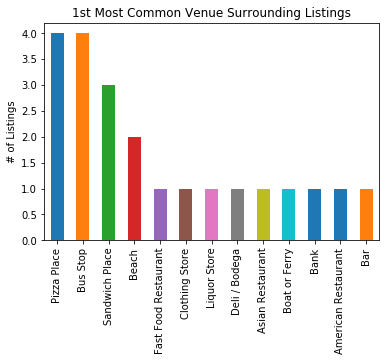

In [105]:
%matplotlib inline
ax = neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().plot(kind='bar')
ax.set_title("1st Most Common Venue Surrounding Listings", fontsize=12)
ax.set_ylabel("# of Listings")


### Cluster Listings

In [106]:
# Run k-means to cluster the listings into 5 clusters
# set number of clusters
kclusters = 5

staten_grouped_clustering = staten_grouped.drop('Listing ID', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 4, 0, 0, 0, 0, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [107]:
staten_merged = staten_data

# add clustering labels
staten_merged['Cluster Labels'] = kmeans.labels_

# merge staten_grouped with staten_data to add latitude/longitude for each neighborhood
staten_merged = staten_merged.join(neighborhoods_venues_sorted.set_index('Listing ID'), on='ID')
staten_merged.head() # check the last columns!

,ID,Neighborhood,Borough,Latitude,Longitude,Price,RS_rating,RS_accuracy,RS_cleanliness,RS_checkin,RS_communication,RS_location,RS_value,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,2794725,Clifton,Staten Island,40.625779,-74.073559,75,80.0,8.0,6.0,10.0,10.0,6.0,8.0,0,Bank,Harbor / Marina,Discount Store
1,8671663,Concord,Staten Island,40.605137,-74.073666,120,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,Bus Stop,Dance Studio,Coffee Shop
2,10784550,Shore Acres,Staten Island,40.608515,-74.067027,90,93.0,10.0,9.0,10.0,10.0,9.0,10.0,0,Bus Stop,Deli / Bodega,Italian Restaurant
3,12584072,Clifton,Staten Island,40.623490,-74.075959,165,90.0,9.0,9.0,9.0,9.0,9.0,9.0,0,Pizza Place,Bank,Chinese Restaurant
4,13743786,Clifton,Staten Island,40.623564,-74.075708,120,88.0,9.0,9.0,10.0,10.0,9.0,9.0,4,Pizza Place,Bank,Chinese Restaurant


Visualize resulting clusters

In [108]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Latitude'], staten_merged['Longitude'], staten_merged['ID'], staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Cluster 1

In [109]:
staten_merged.loc[staten_merged['Cluster Labels'] == 0, staten_merged.columns[[0] + list(range(14, staten_merged.shape[1]))]]

,ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,2794725,Bank,Harbor / Marina,Discount Store
1,8671663,Bus Stop,Dance Studio,Coffee Shop
2,10784550,Bus Stop,Deli / Bodega,Italian Restaurant
3,12584072,Pizza Place,Bank,Chinese Restaurant
5,15178725,Bar,Plaza,Steakhouse
6,17554298,Beach,Gym,Food Service
7,17992512,Sandwich Place,Discount Store,Bank
8,18828846,Liquor Store,Chinese Restaurant,Go Kart Track
10,21517530,Boat or Ferry,Art Gallery,Deli / Bodega
11,22087812,Sandwich Place,Scenic Lookout,Bus Stop


#### Cluster 2

In [110]:
staten_merged.loc[staten_merged['Cluster Labels'] == 1, staten_merged.columns[[0] + list(range(14, staten_merged.shape[1]))]]

,ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
9,21378123,Clothing Store,Shoe Store,Accessories Store
20,27903897,Deli / Bodega,Bus Stop,Coffee Shop


#### Cluster 3

In [111]:
staten_merged.loc[staten_merged['Cluster Labels'] == 2, staten_merged.columns[[0] + list(range(14, staten_merged.shape[1]))]]

,ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
15,25501491,Fast Food Restaurant,Department Store,Food Truck


#### Cluster 4

In [112]:
staten_merged.loc[staten_merged['Cluster Labels'] == 3, staten_merged.columns[[0] + list(range(14, staten_merged.shape[1]))]]

,ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
12,22730139,Asian Restaurant,Pool,Basketball Court
14,24632590,Bus Stop,Park,Gym
21,28840001,American Restaurant,Bus Stop,Discount Store


#### Cluster 5

In [113]:
staten_merged.loc[staten_merged['Cluster Labels'] == 4, staten_merged.columns[[0] + list(range(14, staten_merged.shape[1]))]]

,ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
4,13743786,Pizza Place,Bank,Chinese Restaurant
